# Изучение явления резонанса в колебательном контуре

#### Цель работы
Экспериментальное изучение явления резонанса в последовательном и параллельном колебательных RLC контурах. Получение зависимостей амплитуды напряжения на различных элементах колебательного контура от частоты электродвижущей силы внешнего источника.

#### Идея эксперимента
К колебательному контуру подключается источник гармонического напряжения с плавно изменяющейся частотой. Это позволяет, используя компьютерную систему регистрации, получать амплитудные и фазовые резонансные кривые на различных элементах колебательного контура.

### Обработка эксперимента

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Упражнение 1

$$
    L = \frac{1}{4 \pi^2 f_{рез}^2 C}; \;\;\;\; Q_1 = \frac{f_{рез}}{\Delta f}; \;\;\;\; r = \frac{1}{Q} \sqrt{\frac{L}{C}}
$$
$$
    \beta = \frac{r}{2L}; \;\;\;\; \omega_0 = \frac{1}{\sqrt{LC}}; \;\;\;\; Q_2 = \frac{\sqrt{\omega_0^2 - \beta^2}}{2 \beta}
$$

In [2]:
df1 = pd.DataFrame({
    "$C$, мкФ": 2.2,
    "$f_{рез}$, Гц": [1916.41, 1936.93],
    "$\Delta f$, Гц": [259.88, 274.51],
    "$A$": [5.028, 4.866]
})
df1["$L$, Гн"] = 1 / (4 * np.pi**2 * df1["$f_{рез}$, Гц"]**2 * df1["$C$, мкФ"] * 1e-6)
df1["$Q_1$"] = df1["$f_{рез}$, Гц"] / df1["$\Delta f$, Гц"]
df1["$r$, Ом"] = 1 / df1["$Q_1$"] * np.sqrt(df1["$L$, Гн"] / (df1["$C$, мкФ"] * 1e-6))
df1["$\omega_0$, рад/с"] = 1 / np.sqrt(df1["$C$, мкФ"] * 1e-6 * df1["$L$, Гн"])
df1["$\\beta$, рад/с"] = df1["$r$, Ом"] / 2 / df1["$L$, Гн"]
df1["$Q_2$"] = np.sqrt(df1["$\omega_0$, рад/с"]**2 - df1["$\\beta$, рад/с"]**2) / 2 / df1["$\\beta$, рад/с"]

df1

,"$C$, мкФ","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,"$L$, Гн",$Q_1$,"$r$, Ом","$\omega_0$, рад/с","$\beta$, рад/с",$Q_2$
0,2.2,1916.41,259.88,5.028,0.003135,7.374211,5.119098,12041.159155,816.437099,7.357241
1,2.2,1936.93,274.51,4.866,0.003069,7.055954,5.293315,12170.090117,862.398599,7.038216


In [3]:
print("L =", df1["$L$, Гн"].mean())
print("Q_1 =", df1["$Q_1$"].mean())
print("Q_2 =", df1["$Q_2$"].mean())

L = 0.003101986190182107
Q_1 = 7.215082710067573
Q_2 = 7.19772854870102


#### Упражнение 2
a)

In [4]:
df2a = pd.DataFrame({
    "$R$, Ом": [1, 5.1, 10],
    "$f_{рез}$, Гц": [1882.22, 1889.06, 1854.86],
    "$\Delta f$, Гц": [321.43, 567.63, 820.67],
    "$A$": [5.891, 3.526, 2.437],
    "$C$, мкФ": 2.2
})
df2a["$Q$"] = df2a["$f_{рез}$, Гц"] / df2a["$\Delta f$, Гц"]

df2a

,"$R$, Ом","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,"$C$, мкФ",$Q$
0,1.0,1882.22,321.43,5.891,2.2,5.855770
1,5.1,1889.06,567.63,3.526,2.2,3.327978
2,10.0,1854.86,820.67,2.437,2.2,2.260178


In [5]:
def find_coeffs(x, y):
    A = np.vstack((x, np.ones_like(x))).T
    k, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return k, b

In [6]:
df2a["$1/Q$"] = 1 / df2a["$Q$"]
k, b = find_coeffs(df2a["$R$, Ом"], df2a["$1/Q$"])

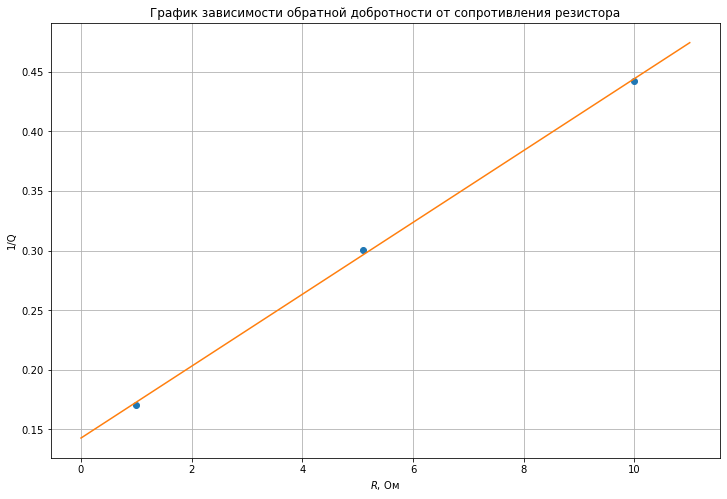

In [7]:
df2a.plot("$R$, Ом", "$1/Q$", style='o', figsize=(12, 8), legend=False)
plt.plot(np.linspace(0, 11, 100), k * np.linspace(0, 11, 100) + b)
plt.title("График зависимости обратной добротности от сопротивления резистора")
plt.grid()
plt.ylabel("1/Q")
plt.show()

Если $1/Q = k R + b$, то
$$
    L = \frac{C}{k^2}; \;\;\;\; r = \frac{b}{k}
$$

Аналогично можно расчитать $\omega_0, \beta, Q_2$

In [8]:
df2a["$L$, Гн"] = df2a["$C$, мкФ"] * 1e-6 / k**2
df2a["$r$, Ом"] = b / k
df2a["$\omega_0$, рад/с"] = 1 / np.sqrt(df2a["$C$, мкФ"] * 1e-6 * df2a["$L$, Гн"])
df2a["$\\beta$, рад/с"] = (df2a["$R$, Ом"] + df2a["$r$, Ом"]) / 2 / df2a["$L$, Гн"]
df2a["$Q_2$"] = np.sqrt(df2a["$\omega_0$, рад/с"]**2 - df2a["$\\beta$, рад/с"]**2) / 2 / df2a["$\\beta$, рад/с"]

df2a

,"$R$, Ом","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,"$C$, мкФ",$Q$,$1/Q$,"$L$, Гн","$r$, Ом","$\omega_0$, рад/с","$\beta$, рад/с",$Q_2$
0,1.0,1882.22,321.43,5.891,2.2,5.855770,0.170772,0.002421,4.736149,13703.015256,1184.800893,5.761178
1,5.1,1889.06,567.63,3.526,2.2,3.327978,0.300483,0.002421,4.736149,13703.015256,2031.655442,3.335105
2,10.0,1854.86,820.67,2.437,2.2,2.260178,0.442443,0.002421,4.736149,13703.015256,3043.749902,2.194776


б)

In [9]:
df2b = pd.DataFrame({
    "$C$, мкФ": [0.22, 0.47, 1, 2.2, 4.7],
    "$R$, Ом": 5.1,
    "$f_{рез}$, Гц": [6252.28, 4269.00, 2880.70, 1895.90, 1280.40],
    "$\Delta f$, Гц": [588.14, 574.46, 560.79, 601.82, 560.79],
    "$A$": [10.45, 7.55, 5.33, 3.65, 2.64],
})

df2b["$Q$"] = df2b["$f_{рез}$, Гц"] / df2b["$\Delta f$, Гц"]

df2b

,"$C$, мкФ","$R$, Ом","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,$Q$
0,0.22,5.1,6252.28,588.14,10.45,10.630598
1,0.47,5.1,4269.00,574.46,7.55,7.431327
2,1.00,5.1,2880.70,560.79,5.33,5.136861
3,2.20,5.1,1895.90,601.82,3.65,3.150277
4,4.70,5.1,1280.40,560.79,2.64,2.283208


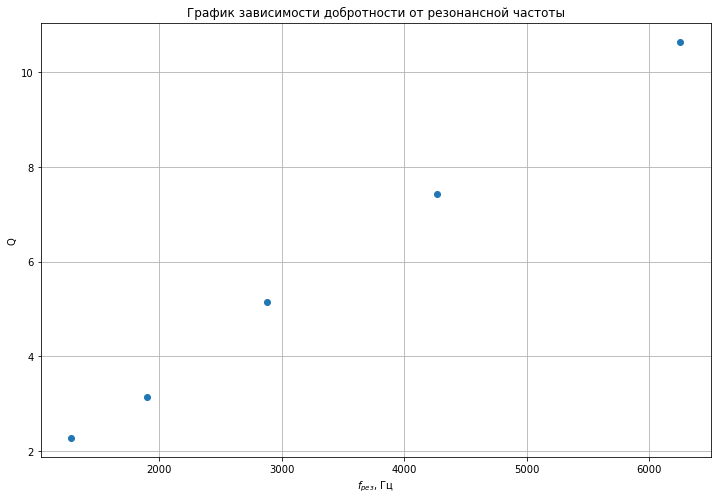

In [10]:
df2b.plot("$f_{рез}$, Гц", "$Q$", style='o', figsize=(12, 8), legend=False)
plt.title("График зависимости добротности от резонансной частоты")
plt.grid()
plt.ylabel("Q")
plt.show()

в)

Помимо формул добростности выше расчитаем также:

$$
    \omega_C = \sqrt{\omega_0^2 - 2 \beta^2}; \;\;\;\; \omega_L = \frac{\omega_0^2}{\sqrt{\omega_0^2 - 2 \beta^2}}
$$

$$
    Q_3 = \frac{\sqrt{\omega_L + \omega_C}}{2 \sqrt{\omega_L - \omega_C}}
$$

In [11]:
df2с = pd.DataFrame({
    "$R$, Ом": 5.1,
    "$C$, мкФ": 0.22,
    "$f_{рез}$, Гц": [6293.31, 6272.8, 6259.12],
    "$\Delta f$, Гц": [519.75, 656.53, 567.63],
    "$A$": [0.494, 10.492, 10.382],
})

df2с["$L$, Гн"] = 1 / (4 * np.pi**2 * df2с["$f_{рез}$, Гц"]**2 * df2с["$C$, мкФ"] * 1e-6)
df2с["$Q_1$"] = df2с["$f_{рез}$, Гц"] / df2с["$\Delta f$, Гц"]
df2с["$r$, Ом"] = 1 / df2с["$Q_1$"] * np.sqrt(df2с["$L$, Гн"] / (df2с["$C$, мкФ"] * 1e-6))
df2с["$\omega_0$, рад/с"] = 1 / np.sqrt(df2с["$C$, мкФ"] * 1e-6 * df2с["$L$, Гн"])
df2с["$\\beta$, рад/с"] = df2с["$r$, Ом"] / 2 / df2с["$L$, Гн"]
df2с["$Q_2$"] = np.sqrt(df2с["$\omega_0$, рад/с"]**2 - df2с["$\\beta$, рад/с"]**2) / 2 / df2с["$\\beta$, рад/с"]

df2с["$\omega_C$, рад/с"] = np.sqrt(df2с["$\omega_0$, рад/с"]**2 - 2 * df2с["$\\beta$, рад/с"]**2)
df2с["$\omega_L$, рад/с"] = df2с["$\omega_0$, рад/с"]**2 / np.sqrt(df2с["$\omega_0$, рад/с"]**2 - 2 * df2с["$\\beta$, рад/с"]**2)
df2с["$Q_3$"] = np.sqrt(df2с["$\omega_L$, рад/с"] + df2с["$\omega_C$, рад/с"]) / 2 / np.sqrt(df2с["$\omega_L$, рад/с"] - df2с["$\omega_C$, рад/с"])

df2с

,"$R$, Ом","$C$, мкФ","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,"$L$, Гн",$Q_1$,"$r$, Ом","$\omega_0$, рад/с","$\beta$, рад/с",$Q_2$,"$\omega_C$, рад/с","$\omega_L$, рад/с",$Q_3$
0,5.1,0.22,6293.31,519.75,0.494,0.002907,12.108341,9.493661,39542.032926,1632.842782,12.098013,39474.548975,39609.632244,12.098013
1,5.1,0.22,6272.80,656.53,10.492,0.002926,9.554476,12.070608,39413.164795,2062.549825,9.541384,39305.080277,39521.546533,9.541384
2,5.1,0.22,6259.12,567.63,10.382,0.002939,11.026760,10.481809,39327.210820,1783.262238,11.015418,39246.266860,39408.321724,11.015418


#### Упражнение 3

In [12]:
df3 = pd.DataFrame({
    "$R$, Ом": [5.1, 22, 10],
    "$f_{рез}$, Гц": [6279.64, 6348.02, 6286.47],
    "$\Delta f$, Гц": [526.59, 2126.9, 1189.97],
    "$A$": [0.037, 0.012, 0.017],
})

df3["$Q$"] = df3["$f_{рез}$, Гц"] / df3["$\Delta f$, Гц"]

df3

,"$R$, Ом","$f_{рез}$, Гц","$\Delta f$, Гц",$A$,$Q$
0,5.1,6279.64,526.59,0.037,11.925103
1,22.0,6348.02,2126.90,0.012,2.984635
2,10.0,6286.47,1189.97,0.017,5.282881


### Вывод

#### Упражнение 1

1) Была расчитана индуктивность катушки: $L = 3.10$ мГн.

2) Двумя способами найдена добротность: $Q_1 = 7.22$, $Q_2 = 7.20$. Так как значения слабо отличаются, то можно считать $\beta \approx \frac{r}{2L}$.

#### Упражнение 2

1) Были получены значения добростности двумя способами, которые примерно равны.

2) С помощью МНК рассчитана индуктивность катушки $L = 2.42$ мГн. Значения из 1 и 2 упражнений расходятся, это может быть связано с малым количеством точек в экспериментах.

3) Был построен график зависимости $Q(f_{рез})$. Из него видно, что зависимости похожа на линейную.

4) Резонансные частоты на разных экспериментах контура примерно одинаковы.

#### Упражнение 3

1) Добротность не удается расчитать вторым способом, так как цепь параллельна генератору.